## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer = None):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizer)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
regs = ['l1','l1_l2']
reg_ratios = [1e-4, 1e-6, 1e-8] 

In [16]:
results = {}

for reg in regs: 
    for reg_ratio in reg_ratios: 

        keras.backend.clear_session() 
        print(f"{str(reg)} regularizer with {reg_ratio} regular ratio") 
        cur_reg = None 
        if reg == 'l1': 
            cur_reg = l1(reg_ratio) 
        else: 
            cur_reg = l1_l2(l1 = reg_ratio, l2 = reg_ratio) 

        model = build_mlp(input_shape = x_train.shape[1:],regularizer = cur_reg) 
        optimizer = keras.optimizers.Adam(lr = LEARNING_RATE) 
        model.compile(optimizer = optimizer, loss ="categorical_crossentropy", metrics = ['accuracy']) 

        history = model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, shuffle = True, validation_data = [x_test,y_test]) 

        if reg == 'l1': 
            name_tag = f"l1_regularizer_{str(reg_ratio)}"
        else: 
            name_tag = f"l1_l2_regularizer_{str(reg_ratio)}"

        results[name_tag] = { 
        'train_loss' : history.history['loss'], 
        'valid_loss' : history.history['val_loss'], 
        'train_acc' : history.history['acc'], 
        'valid_acc' : history.history['val_acc'] 
        }

l1 regularizer with 0.0001 regular ratio
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 33s 651us/step - loss: 3.8424 - acc: 0.2987 - val_loss: 2.7656 - val_acc: 0.3542
Epoch 2/50
50000/50000 [==============================] - 25s 491us/step - loss: 2.4421 - acc: 0.3747 - val_loss: 2.2666 - val_acc: 0.3778
Epoch 3/50
50000/50000 [==============================] - 25s 501us/step - loss: 2.1589 - acc: 0.3904 - val_loss: 2.1019 - val_acc: 0.3914
Epoch 4/50
50000/50000 [==============================] - 30s 605us/step - loss: 2.0177 - acc: 0.4085 - val_loss: 1.9709 - val_acc: 0.4120
Epoch 5/50
50000/50000 [==============================] - 27s 546us/step - loss: 1.9196 - acc: 0.4230 - val_loss: 1.8526 - val_acc: 0.4466
Epoch 6/50
50000/50000 [==============================] - 28s 563us/step - loss: 1.8603 - acc: 0.4311 - val_loss: 1.8231 - val_acc: 0.4479
Epoch 7/50
50000/50000 [===

50000/50000 [==============================] - 38s 763us/step - loss: 1.5016 - acc: 0.4739 - val_loss: 1.5414 - val_acc: 0.4693
Epoch 7/50
50000/50000 [==============================] - 37s 748us/step - loss: 1.4595 - acc: 0.4895 - val_loss: 1.5275 - val_acc: 0.4640
Epoch 8/50
50000/50000 [==============================] - 36s 725us/step - loss: 1.4335 - acc: 0.4975 - val_loss: 1.4990 - val_acc: 0.4707
Epoch 9/50
50000/50000 [==============================] - 43s 851us/step - loss: 1.4026 - acc: 0.5100 - val_loss: 1.4952 - val_acc: 0.4788
Epoch 10/50
50000/50000 [==============================] - 40s 809us/step - loss: 1.3803 - acc: 0.5182 - val_loss: 1.4421 - val_acc: 0.5003
Epoch 11/50
50000/50000 [==============================] - 42s 847us/step - loss: 1.3533 - acc: 0.5244 - val_loss: 1.4512 - val_acc: 0.4893
Epoch 12/50
50000/50000 [==============================] - 41s 829us/step - loss: 1.3318 - acc: 0.5314 - val_loss: 1.4341 - val_acc: 0.5006
Epoch 13/50
50000/50000 [==========

50000/50000 [==============================] - 27s 534us/step - loss: 1.2533 - acc: 0.5527 - val_loss: 1.3889 - val_acc: 0.5056
Epoch 15/50
50000/50000 [==============================] - 27s 533us/step - loss: 1.2278 - acc: 0.5629 - val_loss: 1.3640 - val_acc: 0.5215
Epoch 16/50
50000/50000 [==============================] - 27s 532us/step - loss: 1.2131 - acc: 0.5679 - val_loss: 1.3878 - val_acc: 0.5137
Epoch 17/50
50000/50000 [==============================] - 27s 538us/step - loss: 1.1907 - acc: 0.5742 - val_loss: 1.3556 - val_acc: 0.5224
Epoch 18/50
50000/50000 [==============================] - 26s 528us/step - loss: 1.1751 - acc: 0.5817 - val_loss: 1.3457 - val_acc: 0.5259
Epoch 19/50
50000/50000 [==============================] - 27s 539us/step - loss: 1.1551 - acc: 0.5883 - val_loss: 1.3513 - val_acc: 0.5289
Epoch 20/50
50000/50000 [==============================] - 26s 529us/step - loss: 1.1322 - acc: 0.5984 - val_loss: 1.4047 - val_acc: 0.5103
Epoch 21/50
50000/50000 [=======

Epoch 22/50
50000/50000 [==============================] - 26s 519us/step - loss: 1.5969 - acc: 0.4994 - val_loss: 1.6410 - val_acc: 0.4814
Epoch 23/50
50000/50000 [==============================] - 28s 560us/step - loss: 1.5937 - acc: 0.4990 - val_loss: 1.6473 - val_acc: 0.4799
Epoch 24/50
50000/50000 [==============================] - 31s 623us/step - loss: 1.5844 - acc: 0.5051 - val_loss: 1.6556 - val_acc: 0.4820
Epoch 25/50
50000/50000 [==============================] - 32s 631us/step - loss: 1.5811 - acc: 0.5040 - val_loss: 1.6243 - val_acc: 0.4930
Epoch 26/50
50000/50000 [==============================] - 28s 568us/step - loss: 1.5764 - acc: 0.5069 - val_loss: 1.6007 - val_acc: 0.5020
Epoch 27/50
50000/50000 [==============================] - 33s 661us/step - loss: 1.5734 - acc: 0.5094 - val_loss: 1.6181 - val_acc: 0.4894
Epoch 28/50
50000/50000 [==============================] - 32s 635us/step - loss: 1.5673 - acc: 0.5102 - val_loss: 1.5980 - val_acc: 0.4969
Epoch 29/50
50000/50

Epoch 30/50
50000/50000 [==============================] - 25s 507us/step - loss: 0.9716 - acc: 0.6621 - val_loss: 1.4730 - val_acc: 0.5209
Epoch 31/50
50000/50000 [==============================] - 25s 501us/step - loss: 0.9590 - acc: 0.6639 - val_loss: 1.4797 - val_acc: 0.5153
Epoch 32/50
50000/50000 [==============================] - 25s 495us/step - loss: 0.9449 - acc: 0.6685 - val_loss: 1.4817 - val_acc: 0.5222
Epoch 33/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.9295 - acc: 0.6749 - val_loss: 1.5656 - val_acc: 0.5014
Epoch 34/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.9059 - acc: 0.6843 - val_loss: 1.5041 - val_acc: 0.5337
Epoch 35/50
50000/50000 [==============================] - 28s 567us/step - loss: 0.9023 - acc: 0.6849 - val_loss: 1.4827 - val_acc: 0.5255
Epoch 36/50
50000/50000 [==============================] - 27s 532us/step - loss: 0.8814 - acc: 0.6955 - val_loss: 1.5095 - val_acc: 0.5170
Epoch 37/50
50000/50

Epoch 38/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.8181 - acc: 0.7086 - val_loss: 1.5493 - val_acc: 0.5206
Epoch 39/50
50000/50000 [==============================] - 13s 268us/step - loss: 0.7994 - acc: 0.7159 - val_loss: 1.5652 - val_acc: 0.5194
Epoch 40/50
50000/50000 [==============================] - 13s 263us/step - loss: 0.7865 - acc: 0.7186 - val_loss: 1.6133 - val_acc: 0.5141
Epoch 41/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.7766 - acc: 0.7205 - val_loss: 1.5863 - val_acc: 0.5181
Epoch 42/50
50000/50000 [==============================] - 13s 261us/step - loss: 0.7538 - acc: 0.7307 - val_loss: 1.6299 - val_acc: 0.5202
Epoch 43/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.7599 - acc: 0.7287 - val_loss: 1.6274 - val_acc: 0.5165
Epoch 44/50
50000/50000 [==============================] - 13s 261us/step - loss: 0.7308 - acc: 0.7395 - val_loss: 1.7086 - val_acc: 0.5103
Epoch 45/50
50000/50

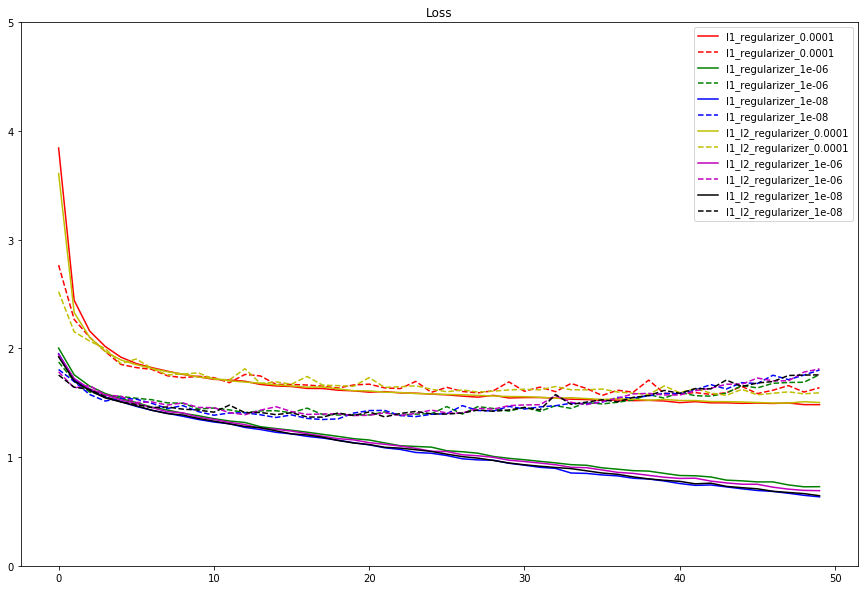

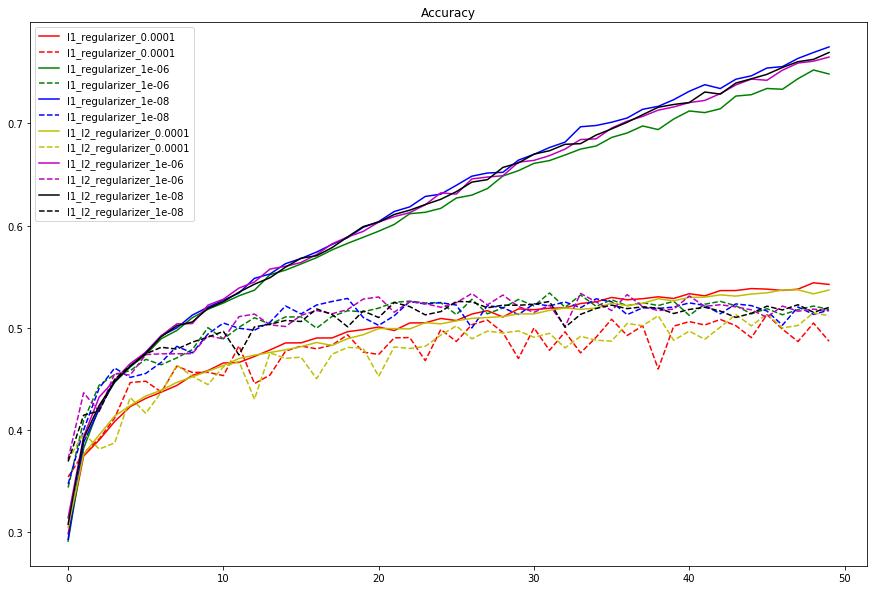

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()